# **1. Khai báo các thư viện cần sử dụng**

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten


# **2. Kết nối với Google Drive để đọc và lưu dữ liệu**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# **3. Khai báo đường dẫn thư mục chứa ảnh dữ liệu**

In [ ]:
import os
train_image_files_path = "/content/drive/MyDrive/AI/Final/Train"
valid_image_files_path = "/content/drive/MyDrive/AI/Final/Validation"

# **4. Gán nhãn dữ liệu**

In [ ]:
label=['-30','-45','-60','-90','0','30','45','60','90']

# **5. Tiền xử lý dữ liệu ảnh với ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen = ImageDataGenerator(rescale=1/255)  
validation_data_gen = ImageDataGenerator(rescale=1/255)

# **6. Đọc dữ liệu train và validation**

In [ ]:
train_generator = train_data_gen.flow_from_directory(
    train_image_files_path,                                         
    target_size=(200, 200),           
    class_mode='categorical')      

validation_generator = validation_data_gen.flow_from_directory(
    valid_image_files_path,
    target_size=(200, 200),               
    class_mode='categorical')


Found 1555 images belonging to 9 classes.
Found 330 images belonging to 9 classes.


# **7. Xây dựng mô hình**

In [ ]:

model=tf.keras.models.Sequential()
# lớp CNN1
model.add(Conv2D(32,(3,3), activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))
# lớp CNN2
model.add(Conv2D(64,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))
# lớp CNN3
model.add(Conv2D(128,(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))  
# chuyển dữ liệu đầu ra của mạng CNN từ mảng 2 chiều về mảng 1 chiều
model.add(Flatten()) 
# lớp ẩn
model.add(Dense(128, activation=tf.nn.relu))
# lớp output
model.add(Dropout(0.2))
model.add(Dense(9, activation=tf.nn.softmax)) 
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 128)     

# **8. Thiết lập các tham số để huấn luyện mô hình**

In [ ]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),  
              loss='categorical_crossentropy', 
              metrics=['acc'])

# **9. Huấn luyện mô hình**

In [ ]:
EPOCHS=50
history=model.fit(
    train_generator,
    steps_per_epoch=1,
    epochs=EPOCHS,
    verbose=1,
    validation_data = validation_generator,
    validation_steps=2)

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 2.2075 - acc: 0.0000e+00 - val_loss: 3.4280 - val_acc: 0.2188
Epoch 2/50
1/1 [==============================] - 1s 596ms/step - loss: 3.5504 - acc: 0.0938 - val_loss: 2.8327 - val_acc: 0.0781
Epoch 3/50
1/1 [==============================] - 1s 626ms/step - loss: 2.8759 - acc: 0.0938 - val_loss: 2.2117 - val_acc: 0.0469
Epoch 4/50
1/1 [==============================] - 1s 638ms/step - loss: 2.1418 - acc: 0.1562 - val_loss: 2.1973 - val_acc: 0.1406
Epoch 5/50
1/1 [==============================] - 1s 612ms/step - loss: 2.0935 - acc: 0.2500 - val_loss: 2.1228 - val_acc: 0.2188
Epoch 6/50
1/1 [==============================] - 1s 626ms/step - loss: 2.0783 - acc: 0.2500 - val_loss: 2.0975 - val_acc: 0.1250
Epoch 7/50
1/1 [==============================] - 1s 631ms/step - loss: 2.1147 - acc: 0.0625 - val_loss: 2.1542 - val_acc: 0.0938
Epoch 8/50
1/1 [==============================] - 1s 621ms/step - loss: 2.1089 - acc: 0.1

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/AI/Final/Gocxoay.h5')
model = load_model('/content/drive/MyDrive/AI/Final/Gocxoay.h5')

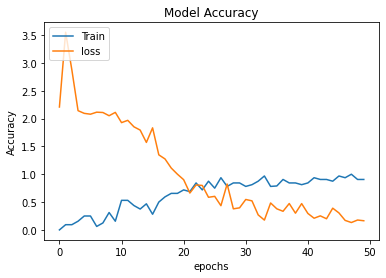

In [ ]:
from google.colab import files
from keras.preprocessing import image
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(['Train','loss'],loc='upper left')
plt.show()

# **10. Sử dụng mô hình**

Saving 1.jpg to 1.jpg
[[0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Góc xoay khuôn mặt dự đoán được là:  0


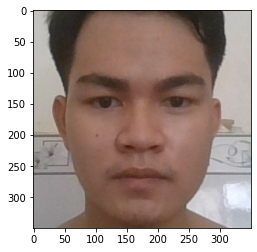

In [ ]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Góc xoay khuôn mặt dự đoán được là: ', label[np.argmax(y_predict)])

Saving vidu.jpg to vidu (1).jpg
[[1. 0. 0. 0. 0. 0. 0. 0. 0.]]
Góc xoay khuôn mặt dự đoán được là:  -30


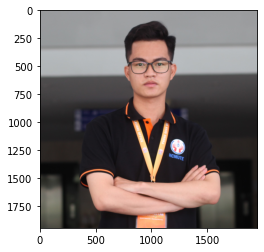

In [ ]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Góc xoay khuôn mặt dự đoán được là: ', label[np.argmax(y_predict)])

Saving tgiang.jpg to tgiang.jpg
[[0. 0. 0. 0. 0. 1. 0. 0. 0.]]
Góc xoay khuôn mặt dự đoán được là:  30


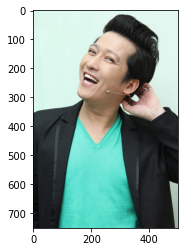

In [ ]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Góc xoay khuôn mặt dự đoán được là: ', label[np.argmax(y_predict)])

Saving images.jpg to images (1).jpg
[[0. 0. 0. 0. 0. 0. 0. 0. 1.]]
Góc xoay khuôn mặt dự đoán được là:  90


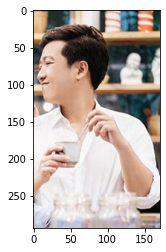

In [ ]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Góc xoay khuôn mặt dự đoán được là: ', label[np.argmax(y_predict)])

Saving chipu.jpg to chipu.jpg
[[0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  5.578639e-22 0.000000e+00 0.000000e+00 1.000000e+00]]
Góc xoay khuôn mặt dự đoán được là:  90


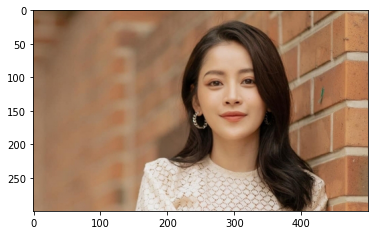

In [ ]:
uploaded=files.upload()
for fn in uploaded.keys():
  #predicting images
  path='/content/'+fn
  #In ảnh đọc được
  plt.imshow(mpimg.imread(path))
  img=image.load_img(path,target_size=(200,200))
  x=image.img_to_array(img)
  x=np.expand_dims(x,axis=0)
  images=np.vstack([x])
  y_predict = model.predict(images,batch_size=10)
  print(y_predict)
  print('Góc xoay khuôn mặt dự đoán được là: ', label[np.argmax(y_predict)])